# Colossus tutorial: Halo mass function

Welcome to the Colossus halo mass function tutorial.

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We begin by setting a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15');

The halo mass function quantifies how many halos there are of a given mass. All models implemented in Colossus specify this abundance in units of $f(\sigma)$, the natural units in Press-Schechter theory. However, for many purposes, more intuitive units are desired. Let's make a plot of the mass function according to [Tinker et al. 2008](http://adsabs.harvard.edu/abs/2008ApJ...688..709T) at a few redshifts:

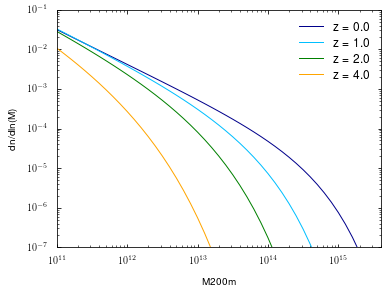

In [3]:
from colossus.lss import mass_function

z = [0.0, 1.0, 2.0, 4.0]
M = 10**np.arange(11.0, 15.5, 0.1)

plt.figure()
plt.xlabel('M200m')
plt.ylabel('dn/dln(M)')
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

The redshift evolution is mostly due to the change of $\sigma(M)$, as in the relation between mass and variance (and thus peak height). At fixed peak height, the function changes only mildly. Now let's compare some models for the FOF mass function:

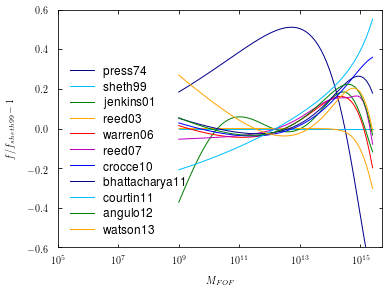

In [4]:
z = 0.0
M = 10**np.arange(9.0, 15.5, 0.1)

plt.figure()
plt.xscale('log')
plt.xlabel('$M_{FOF}$')
plt.ylabel('$f/f_{sheth99} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'sheth99')
for model in mass_function.models:
    if 'fof' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = 'fof', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);

Let's make the same plot but for the SO mass function, say $M_{\rm 200m}$. Some models can handle arbitrary mass definitions indicated by `*` in their `mdefs` field.

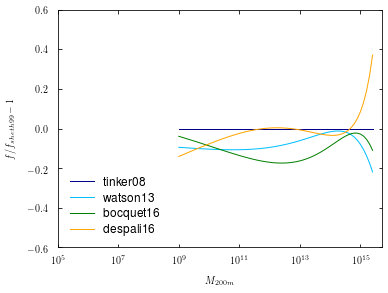

In [5]:
plt.figure()
plt.xscale('log')
plt.xlabel('$M_{200m}$')
plt.ylabel('$f/f_{sheth99} - 1$')
plt.xlim(1E5, 5E15)
plt.ylim(-0.6, 0.6)
plt.axhline(1.0, ls = '--', color = 'gray')

ref = mass_function.massFunction(M, z, model = 'tinker08', mdef = '200m')
for model in mass_function.models:
    if '200m' in mass_function.models[model].mdefs or '*' in mass_function.models[model].mdefs:
        mfunc = mass_function.massFunction(M, z, mdef = '200m', model = model)
        plt.plot(M, mfunc / ref - 1.0, '-', label = model)
plt.legend(loc = 3);